In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
igre = pd.read_csv('csvji/podatki.csv', index_col='stevilka')
ocene = pd.read_json("jsoni/ocene.json")
nekaj = pd.read_csv('csvji/igre.csv')

In [20]:
igre['Metascore'] = ocene['Metascore']
igre['Ocena_uporabnikov'] = ocene['ocena_uporabnikov']

In [21]:
igre['ESBR'] = nekaj['esbr']
igre['Založnik'] = nekaj['Zaloznik']
igre['1.žanr'] = nekaj['zanr1']
igre['2.žanr'] = nekaj['zanr2']
igre['Založnik'] = igre['Založnik'].replace('Electronic', 'EA')
igre['Založnik'] = igre['Založnik'].replace('Intelligent', 'Intelligent Systems')
igre['Založnik'] = igre['Založnik'].replace('Q', 'Q Entertainment')


In [22]:
igre[igre['Založnik']=='Q Entertainment'].count()

url_do_igre          32
konzola              32
naslov               32
Datum_izdaje         32
povzetek             32
Metascore            32
Ocena_uporabnikov    32
ESBR                 22
Založnik             32
1.žanr               32
2.žanr               32
dtype: int64

In [23]:
zamenjaj = {'pc':'PC', 'nintendo-64':'Nintendo 64', 'playstation':'Playstation', 'playstation-3':'Playstation 3', 'dreamcast':'Dreamcast', 
           'xbox-360':'Xbox 360', 'wii':'Wii', 'switch':'Switch', 'playstation-2':'Playstation 2', 'playstation-4':'Playstation 4', 
           'gamecube':'Gamecube','xbox':'Xbox', 'wii-u':'Wii U', 'game-boy-advance':'Game Boy Advance', '3ds':'Nintendo 3DS','ds':'Nintendo DS',
           'playstation-vita':'Playstation Vita', 'psp':'PSP', 'xbox-one':'Xbox One'}

In [24]:
igre = igre.replace({'konzola':zamenjaj})
igre = igre[igre['Ocena_uporabnikov']!='tbd']

In [25]:
igre = igre.drop(columns='url_do_igre')

In [26]:
igre = igre[:16500]

In [27]:
igre[igre['naslov'] == 'Counter-Strike: Global Offensive']

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr
stevilka,,,,,,,,,,
2543.0,PC,Counter-Strike: Global Offensive,"August 21, 2012",Counter-Strike: Global Offensive features new ...,83.0,7.7,M,Capcom,Action Adventure,Survival
3928.0,Playstation 3,Counter-Strike: Global Offensive,"August 21, 2012",Counter-Strike: Global Offensive features new ...,80.0,7.6,E,EA,Sim,Sim
4266.0,Xbox 360,Counter-Strike: Global Offensive,"August 22, 2012",Counter-Strike: Global Offensive features new ...,79.0,8.2,T,Raven,Role-Playing,Action RPG


In [28]:
igre['Metascore'] = pd.to_numeric(igre['Metascore'])
igre['Ocena_uporabnikov'] = pd.to_numeric(igre['Ocena_uporabnikov'])
igre['Skupna ocena'] = igre['Metascore'] + igre['Ocena_uporabnikov']*10
igre

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena
stevilka,,,,,,,,,,,
1.0,Nintendo 64,The Legend of Zelda: Ocarina of Time,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",98.0,7.5,E,Nintendo,Action Adventure,Fantasy,173.0
2.0,Playstation,Tony Hawk's Pro Skater 2,"September 20, 2000",As most major publishers' development efforts ...,98.0,7.5,T,Neversoft,Alternative,Skateboarding,173.0
3.0,Playstation 3,Grand Theft Auto IV,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98.0,8.6,M,Rockstar,Modern,Open-World,184.0
4.0,Dreamcast,SoulCalibur,"September 8, 1999","This is a tale of souls and swords, transcendi...",98.0,7.9,T,Namco,Fighting,3D,177.0
5.0,Xbox 360,Grand Theft Auto IV,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,97.0,9.0,M,Rockstar,Modern,Open-World,187.0
...,...,...,...,...,...,...,...,...,...,...,...
16496.0,Xbox 360,Teenage Mutant Ninja Turtles: Out of the Shadows,"August 28, 2013","The oldest brother, Leonardo is the leader of ...",38.0,3.2,T,Mastiff,First-Person,Arcade,70.0
16497.0,Wii,Naruto Shippuden: Dragon Blade Chronicles,"November 12, 2010",Take control of both Naruto and Sasuke as they...,38.0,3.0,T,Black,Action Adventure,Sci-Fi,68.0
16498.0,Xbox 360,Vampire Rain,"July 3, 2007",You are a part of a Special Forces team tasked...,38.0,5.5,T,Bandai,Fighting,3D,93.0


In [29]:
igre['Datum'] = pd.to_datetime(igre['Datum_izdaje'])


In [30]:
igre.drop(columns='Datum_izdaje')

,konzola,naslov,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,
1.0,Nintendo 64,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ...",98.0,7.5,E,Nintendo,Action Adventure,Fantasy,173.0,1998-11-23
2.0,Playstation,Tony Hawk's Pro Skater 2,As most major publishers' development efforts ...,98.0,7.5,T,Neversoft,Alternative,Skateboarding,173.0,2000-09-20
3.0,Playstation 3,Grand Theft Auto IV,[Metacritic's 2008 PS3 Game of the Year; Also ...,98.0,8.6,M,Rockstar,Modern,Open-World,184.0,2008-04-29
4.0,Dreamcast,SoulCalibur,"This is a tale of souls and swords, transcendi...",98.0,7.9,T,Namco,Fighting,3D,177.0,1999-09-08
5.0,Xbox 360,Grand Theft Auto IV,[Metacritic's 2008 Xbox 360 Game of the Year; ...,97.0,9.0,M,Rockstar,Modern,Open-World,187.0,2008-04-29
...,...,...,...,...,...,...,...,...,...,...,...
16496.0,Xbox 360,Teenage Mutant Ninja Turtles: Out of the Shadows,"The oldest brother, Leonardo is the leader of ...",38.0,3.2,T,Mastiff,First-Person,Arcade,70.0,2013-08-28
16497.0,Wii,Naruto Shippuden: Dragon Blade Chronicles,Take control of both Naruto and Sasuke as they...,38.0,3.0,T,Black,Action Adventure,Sci-Fi,68.0,2010-11-12
16498.0,Xbox 360,Vampire Rain,You are a part of a Special Forces team tasked...,38.0,5.5,T,Bandai,Fighting,3D,93.0,2007-07-03


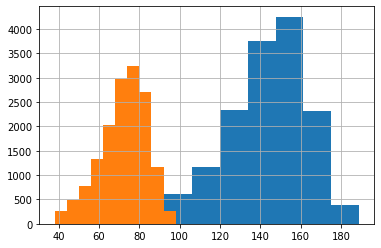

In [31]:
igre['Skupna ocena'].hist()
igre['Metascore'].hist()

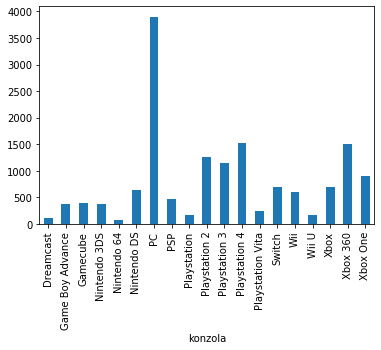

In [32]:
konzole = igre.groupby('konzola').size()
konzole.plot.bar()

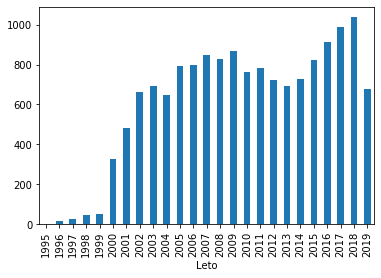

In [33]:
vsota = igre.groupby(igre['Datum'].dt.year.rename('Leto')).count()
vsota['Datum'].plot.bar()

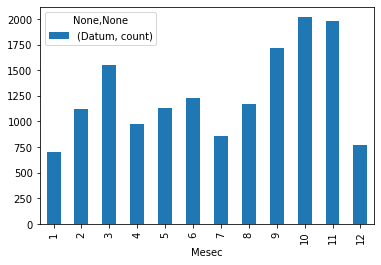

In [34]:
sumarija = igre.groupby([igre['Datum'].dt.month.rename('Mesec')]).agg({'count'})[['Datum']]
sumarija.plot.bar()

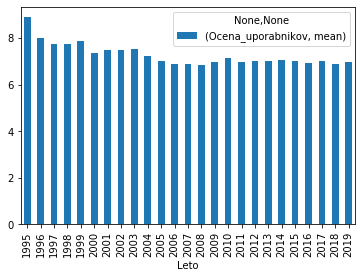

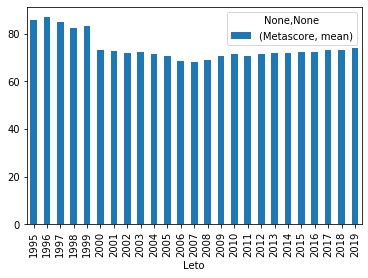

In [35]:
igre1 = igre.drop(columns='Skupna ocena')
igre2 = igre1.drop(columns='Metascore')
igre3 = igre1.drop(columns='Ocena_uporabnikov')
igre2.groupby([igre['Datum'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()
igre3.groupby([igre['Datum'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()

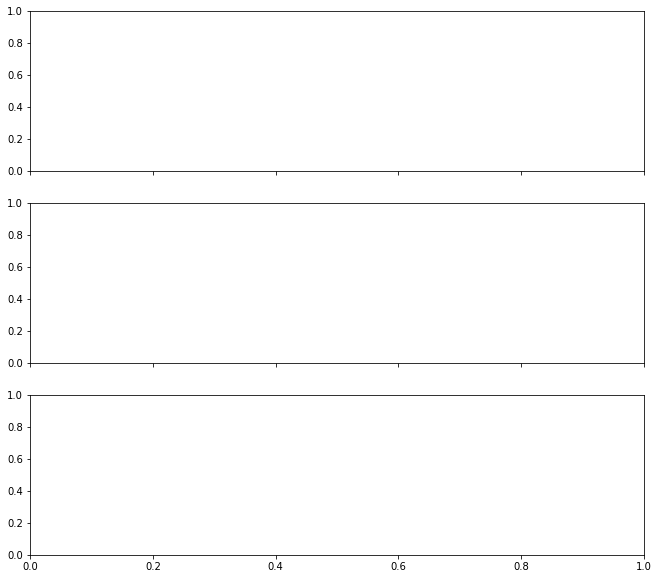

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

In [38]:
(igre.groupby(['1.žanr']).size() + igre.groupby(['2.žanr']).size()).sum()



23988.0

In [39]:
igre.groupby(['2.žanr', '1.žanr']).size()


2.žanr         1.žanr      
2D             2D              312
               3D                6
               Action           94
               Action RPG        5
               Compilation      10
                              ... 
Western-Style  Roguelike         3
               Role-Playing    102
Wrestling      3D                1
               Combat           55
               Fighting         43
Length: 535, dtype: int64

In [40]:
igre[igre['Založnik'] == 'The'].groupby(['Založnik']).size()

Založnik
The    109
dtype: int64

In [41]:
igre.groupby(['1.žanr', '2.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation']).sort_values()


1.žanr            2.žanr     
Matching          Action           1
Edutainment       Application      1
Hidden Object     Puzzle           1
Historic          3D               1
Party             Compilation      1
                                ... 
Action Adventure  General        317
Sim               Sim            326
Role-Playing      Action RPG     351
Sci-Fi            Arcade         352
Platformer        2D             516
Length: 430, dtype: int64

In [42]:
vsota1 =  igre.groupby(['1.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota1

1.žanr
Action               531
Action Adventure    1083
Action RPG           242
Adventure            320
Alternative          123
                    ... 
WWII                  28
Wakeboarding           1
Wargame                6
Western-Style          1
Wrestling              2
Length: 124, dtype: int64

In [43]:
vsota2 = igre.groupby(['2.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota2

2.žanr
4X                47
Action           131
Action RPG       602
Adventure         16
Application       11
                ... 
WWI                1
WWII              10
Wakeboarding       4
Western-Style    196
Wrestling         99
Length: 112, dtype: int64

In [44]:
vsota = vsota2.add(vsota1, fill_value=0)

In [45]:
ind = vsota > 300

In [46]:
vsota[ind]

Action               662.0
Action Adventure    1083.0
Action RPG           844.0
Adventure            336.0
Automobile           550.0
Fantasy              988.0
First-Person         600.0
Historic             495.0
Music                370.0
Open-World           380.0
Platformer           759.0
Puzzle               393.0
Role-Playing         789.0
Sci-Fi               939.0
Sim                 1061.0
Survival             306.0
Third-Person         434.0
dtype: float64

In [47]:
vsota.drop(labels=['3D', '2D', 'General'])

KeyError: "['3D' '2D' 'General'] not found in axis"

In [48]:
vsotaa = vsota/16500
vsotaa.drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])[ind].plot.bar()



KeyError: "['3D' '2D' 'General' 'Modern' 'Arcade' 'Compilation'] not found in axis"

                konzola                              naslov  \
stevilka                                                      
23.0                 PC                         Half-Life 2   
30.0           Xbox 360                      The Orange Box   
31.0                 PC                      The Orange Box   
37.0                 PC                           Half-Life   
59.0                 PC                            Portal 2   
61.0           Xbox 360                            Portal 2   
63.0      Playstation 3                            Portal 2   
204.0                PC                     Team Fortress 2   
374.0              Xbox                         Half-Life 2   
406.0                PC                              Portal   
431.0          Xbox 360                 Portal: Still Alive   
432.0                PC            Half-Life 2: Episode Two   
472.0                PC                              Dota 2   
550.0          Xbox 360                       Left 4 De

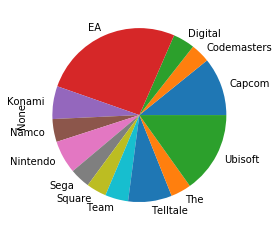

In [49]:
zaloz = igre.groupby(['Založnik']).size()
zaloz[zaloz>100].plot.pie()
igre[igre['Založnik'] == 'Valve'] 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(igre[igre['Založnik'] == 'Valve'] )

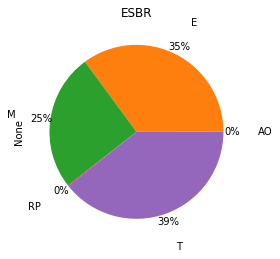

In [50]:
igre.groupby('ESBR').size().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4, title='ESBR')

In [51]:
prava = igre.sort_values('Skupna ocena', ascending= False)

In [52]:
igre[igre['Založnik']=='Valve'].count()

konzola              28
naslov               28
Datum_izdaje         28
povzetek             28
Metascore            28
Ocena_uporabnikov    28
ESBR                 22
Založnik             28
1.žanr               28
2.žanr               28
Skupna ocena         28
Datum                28
dtype: int64

In [53]:
felc = igre[igre['Založnik']=='Zen'].groupby('Založnik').mean()

zal = zaloz[zaloz>27].reset_index()
for zaloznik in zal['Založnik']:
    felc = felc.append(igre[igre['Založnik']==zaloznik].groupby('Založnik').mean())
felc = felc.sort_values('Skupna ocena', ascending=False)
felc.head(30)
felc['Metascore']

Založnik
Valve                  86.821429
Rockstar               84.695652
Intelligent Systems    83.588235
Rare                   80.096774
Blizzard               86.435897
                         ...    
Krome                  61.571429
Cyanide                63.729730
THQ                    63.842105
Blitz                  60.406250
Artificial             57.571429
Name: Metascore, Length: 102, dtype: float64

In [55]:
igre.describe(percentiles=[.25, .5, .75])


,Metascore,Ocena_uporabnikov,Skupna ocena
count,15219.000000,15219.000000,15219.000000
mean,71.635127,7.066010,142.295223
std,11.471074,1.307092,21.198073
min,38.000000,0.700000,51.000000
25%,65.000000,6.400000,130.000000
50%,73.000000,7.300000,145.000000
75%,80.000000,8.000000,158.000000
max,98.000000,9.400000,189.000000


In [56]:
igre[igre['Ocena_uporabnikov']=='tbd']

c:\users\zankr\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,,


In [57]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_positive_green(val):
    color = 'green' if val > 80 else 'black'
    return 'color: %s' % color
felc = felc.reset_index(drop=True).style.apply(color_positive_green)


KeyError: "['3D' '2D' 'General' 'Modern' 'Arcade' 'Compilation'] not found in axis"

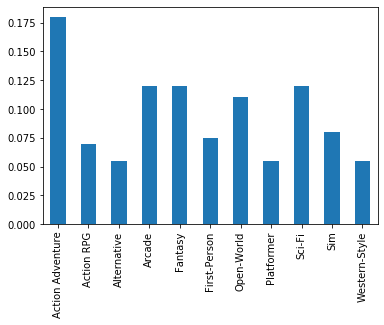

In [58]:
top200 = igre[:200]
top200

vsota1 =  top200.groupby(['1.žanr']).size()
vsota2 = top200.groupby(['2.žanr']).size()
vsota = vsota2.add(vsota1, fill_value=0)
vsota = vsota/200
vsota[vsota>0.05].drop(labels=['3D', '2D', 'General', 'Modern']).plot.bar()
vsotaa.drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])[ind].plot.bar()

In [59]:
igre.sort_values('Ocena_uporabnikov', ascending=False)

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,,
109.0,Nintendo 64,Super Mario 64,"September 26, 1996",Mario is super in a whole new way! Combining t...,93.0,9.4,E,Nintendo,Platformer,3D,187.0,1996-09-26
53.0,Nintendo 64,The Legend of Zelda: Majora's Mask,"October 25, 2000",Thrown into a parallel world by the mischievou...,95.0,9.2,E,Nintendo,Action Adventure,Fantasy,187.0,2000-10-25
17.0,Playstation 4,Grand Theft Auto V,"November 18, 2014",The sprawling sun-soaked metropolis of Los San...,97.0,9.2,M,Rockstar,Modern,Open-World,189.0,2014-11-18
8001.0,PC,Pathfinder: Kingmaker,"September 25, 2018",Pathfinder: Kingmaker is the first isometric p...,73.0,9.2,NaN,Playtonic,Platformer,3D,165.0,2018-09-25
277.0,Wii U,Bayonetta 2,"September 20, 2014",In this climatic sequel to the critically accl...,91.0,9.2,M,PlatinumGames,Fantasy,Linear,183.0,2014-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...
9714.0,Nintendo DS,Mr. Driller: Drill Spirits,"November 30, 2004",Master the art of drilling and take advantage ...,70.0,1.0,E,Nintendo,Puzzle,General,80.0,2004-11-30
4472.0,Playstation 3,NHL 2K7,"November 13, 2006",Hundreds of new skating animations have been c...,79.0,0.9,E,EA,Soccer,Sim,88.0,2006-11-13
16282.0,Xbox 360,Mindjack,"January 18, 2011","With this unique action shooter set in 2031, S...",43.0,0.8,T,M4,Platformer,2D,51.0,2011-01-18


In [60]:
igre['razlika']  =abs(igre.sort_values('Ocena_uporabnikov', ascending = False).index - igre.index)
igre['razlika'].mean()

3610.3205204021287

In [69]:
def razlika (k):
    return igre['razlika'][:k].mean()

x = []
y = []

for k in range(0,16500):
    x.append(k)
    y.append(razlika(k))
    

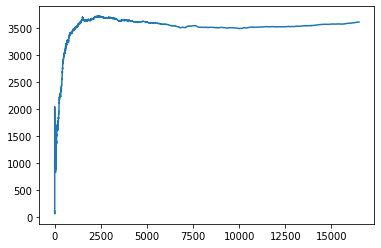

In [70]:
plt.plot(x,y)

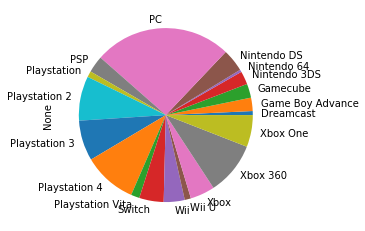

In [64]:
igre.groupby('konzola').size().plot.pie()